# Sales Analysis

## Business Understanding

The management of a small retail company based in the US want to identify areas they can better enhance their operations. They are not sure of how exactly to do and have therefore hired a data analyst to help them derive insights to guide their planning.
They have provided monthly data on sales for the year 2019, which will be analysed inline with CRISP-DM(Cross Industry Standard Process for Data Mining) steps.

After careful consideration of the business and its needs, the answers to the following questions
- Question 1: What was the best month for sales?
- Question 2: What city sold the most?
- Question 3: What are the peak shopping hours?
- Question 4: What products sold the most?


#### Import necessary libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from collections import Counter
import matplotlib.ticker as ticker
import seaborn as sns



#### Merge data from each month into one CSV

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files This is a list comprehension that creates a list of all files in the directory specified by the "path" variable that do not start with a period ).

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("data_comb.csv", index=False)
    

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("data_comb.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Understanding and Assessment

In [5]:
# Checking how many rows and columns are in the data
shape = all_data.shape

print(f"The Sales Data has {shape[0]} rows and {shape[1]} columns")

The Sales Data has 186850 rows and 6 columns


In [6]:
all_data.describe() # looking at the summary statistics of the columns

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning


##### Drop rows of NAN

In [8]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### In the concatenation, the various column headings were repeated throughout the combined data

In [9]:
all_data.iloc[516:520]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
521,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"


#### Position 519 in the slice confirms this

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Filtering all the rows with 'Or' as the first two letters in the Order Date Column takes care of this

#### Make columns correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
# This would not have been possible without filtering out the repeated column headings

### Augment data with additional columns

#### Add month column

In [12]:
all_data['Month'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M').dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city and its state column

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Sales column

In [14]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


## Data Exploration

#### Checking the distribution of Sales, Price and Quantity Ordered columns and the presence of outliers

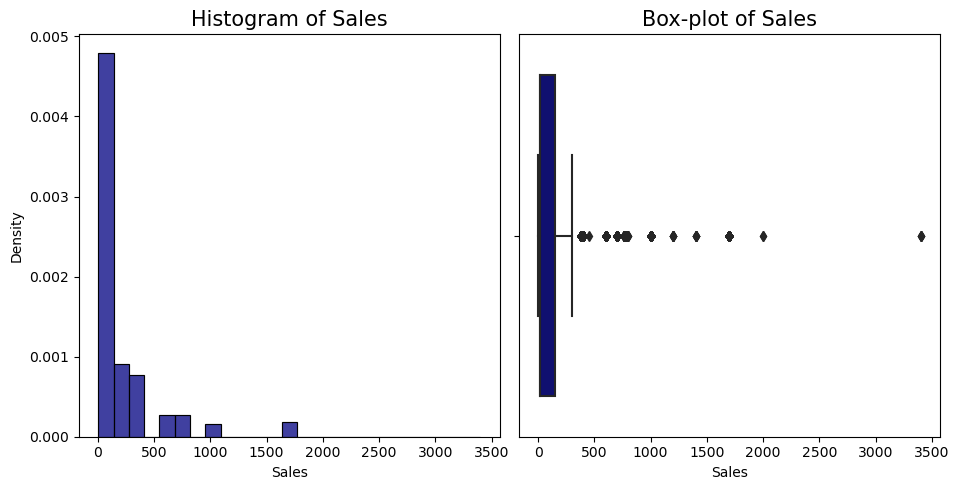

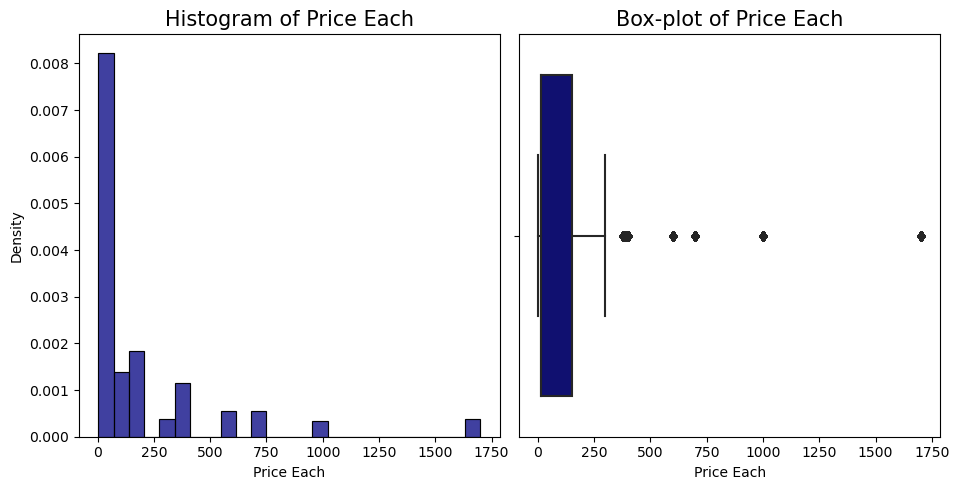

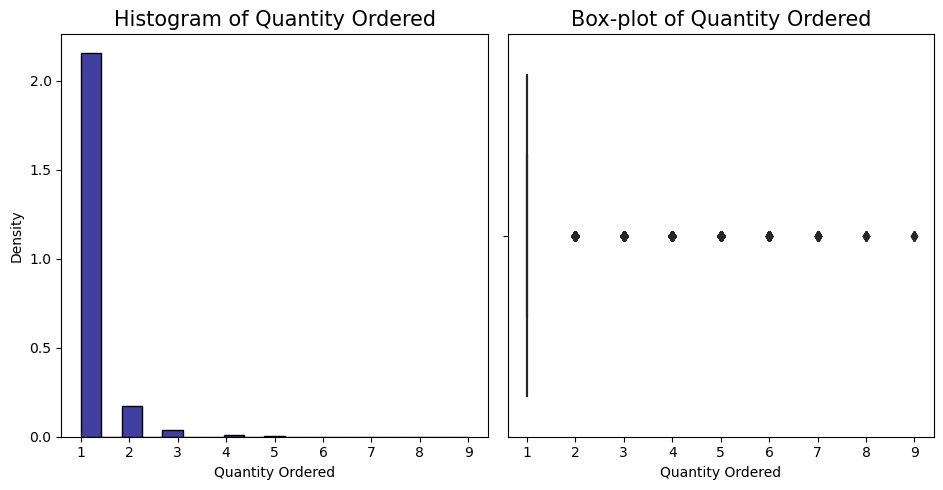

In [15]:
numerical_cols = all_data[['Sales','Price Each','Quantity Ordered']]
for i,col in enumerate(numerical_cols):
    plt.figure(figsize=(14,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = all_data,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.boxplot(data = all_data,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

The following observations were made from the numerical distribution of some columns in the lines of code above

- The Distribution of Sales is extremely right skewed.
- The Distribution of Price also right skewed.
- The Distribution of Quantity Ordered is right skewed with a lot of outliers on the right side

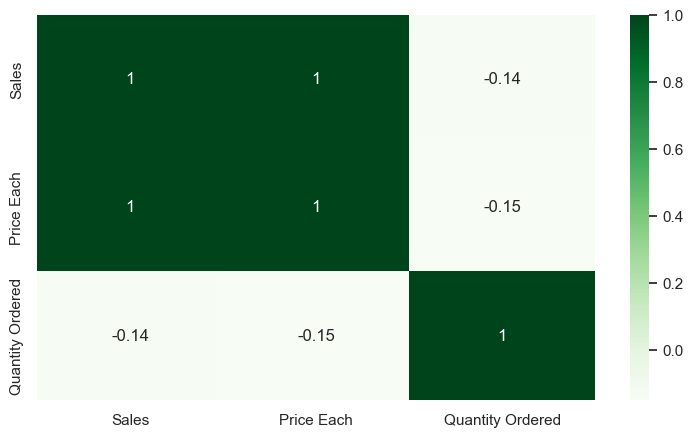

In [16]:
heat = all_data[['Sales','Price Each','Quantity Ordered']]
plt.figure(figsize=(9,5))
sns.set_theme(style="white")
corr = heat.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

#### Price and Sales are perfectly positive correlated, and they both have a slightly negative correlation with quantity ordered

#### Question 1: What was the best month for sales? How much was earned that month? 

In [17]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


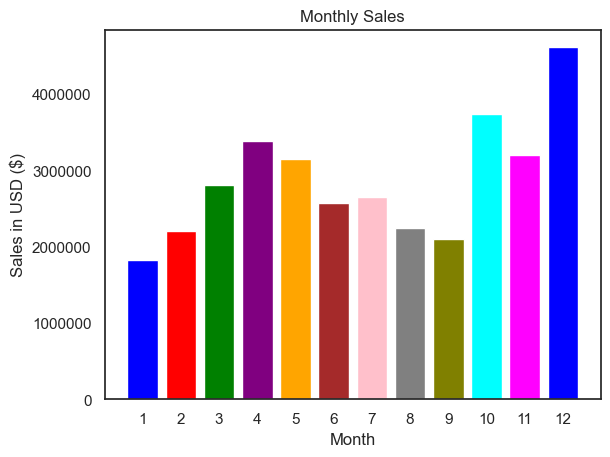

In [18]:

months = range(1,13)
print(months)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'], color=colors)
plt.xticks(months)
plt.gca().ticklabel_format(style='plain', axis = 'y')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title("Monthly Sales")
plt.show()



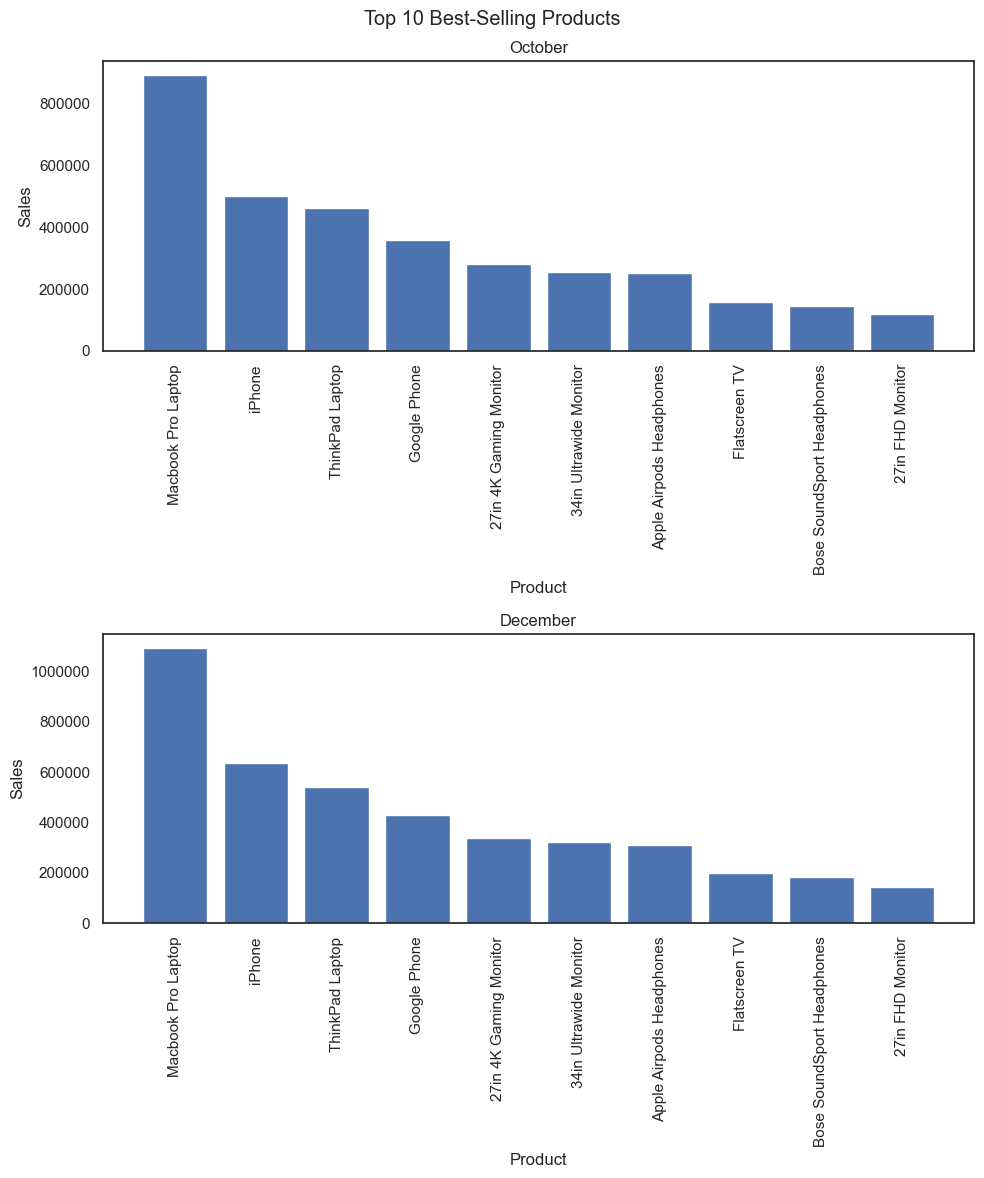

In [19]:
# Best Selling Products in December and October

# Subset the data to include only month 10 and month 12
month10_data = all_data[all_data['Month'] == 10]
month12_data = all_data[all_data['Month'] == 12]

# Get the top 10 best-selling products in month 10 and month 12
top_products10 = month10_data.groupby('Product').sum()['Sales'].nlargest(10)
top_products12 = month12_data.groupby('Product').sum()['Sales'].nlargest(10)

# Create subplots with two rows and one column
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
fig.suptitle('Top 10 Best-Selling Products')

# Create a bar chart for the best-selling products in month 10
axs[0].bar(top_products10.index, top_products10.values)
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Sales')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_title('October')

# Create a bar chart for the best-selling products in month 12
axs[1].bar(top_products12.index, top_products12.values)
axs[1].set_xlabel('Product')
axs[1].set_ylabel('Sales')
axs[1].tick_params(axis='x', rotation=90)
plt.gca().ticklabel_format(style='plain', axis='y')
axs[1].set_title('December')

# Adjust the layout of the subplots and show the plot
plt.tight_layout()
plt.show()



The same products make up the top 10 in the best selling months

December leads the pack when it comes to best selling years, with October the following closely behind.

#### Question 2: What city sold the most product?

In [20]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


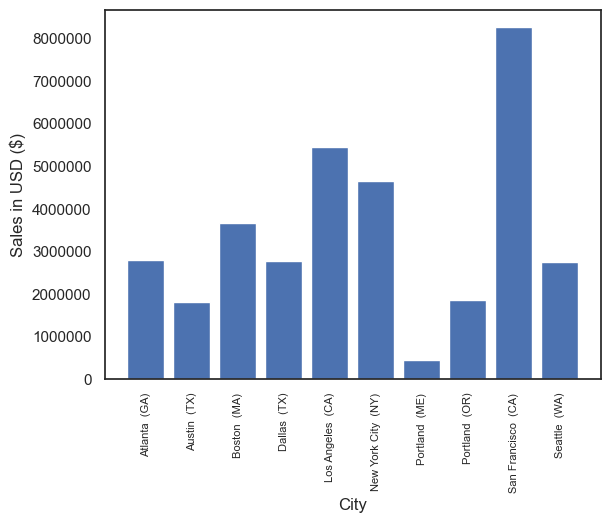

In [21]:


keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.gca().ticklabel_format(style='plain', axis = 'y')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

San Francisco is the best selling city by some distance, followed by Los Angeles and New York City. Portland takes uneviable tag of being the worst performing

#### Question 3: What are the peak shopping hours

In [22]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M').dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M').dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


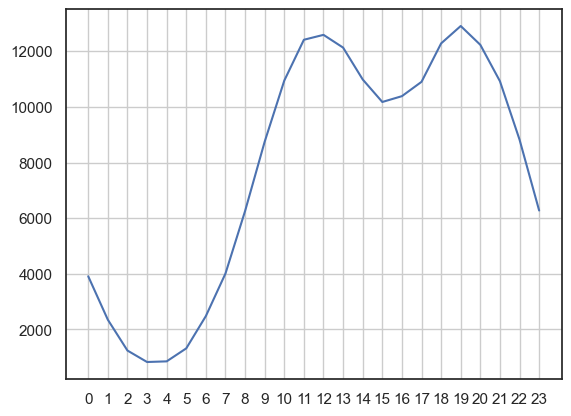

In [23]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()



Early evening at 7pm seems to be the most preferred time to shop for the shop's customers, very closely followed by noon 

#### Question 4: What products are most often sold together?

In [24]:
# Pulling out all orders
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Placing all order items together in a 'grouped' column 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'Grouped']].drop_duplicates()  # dropping duplicates in new dataframe

In [25]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# 
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Visualizing the above

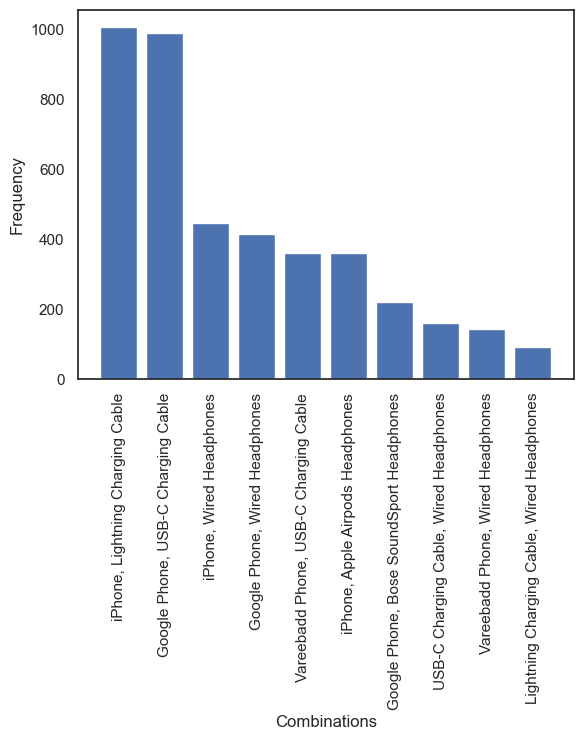

In [26]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Get the top 10 combinations
top_combinations = count.most_common(10)

# Extract the combination pairs and their counts
pairs = [pair[0] for pair in top_combinations]
counts = [pair[1] for pair in top_combinations]

# Create a bar chart
plt.bar(range(len(pairs)), counts)
plt.xticks(range(len(pairs)), [', '.join(pair) for pair in pairs], rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Combinations')
plt.show()

Phones and their accessories made for the most purchased combinations

#### What were the best selling products by quantity

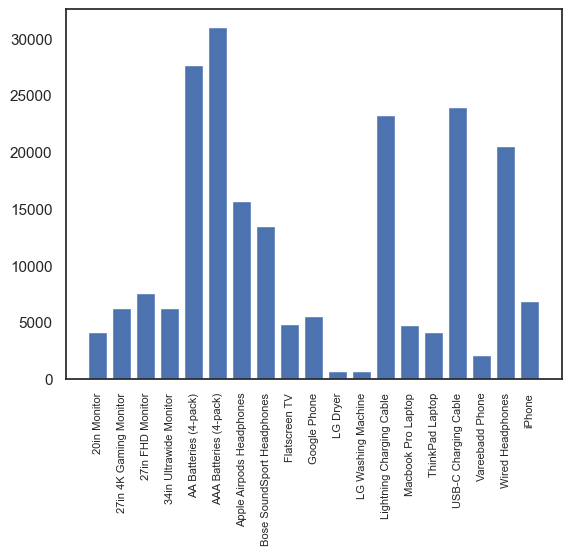

In [27]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

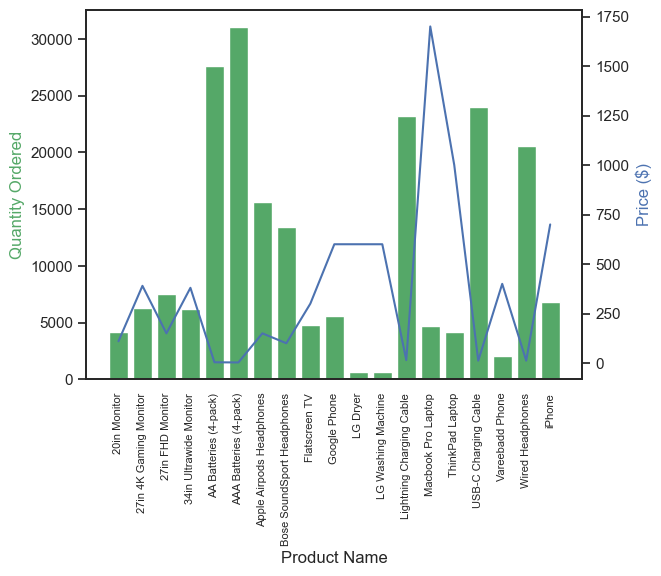

In [28]:
# Adding a secondary y label for price
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

Price does seem to be somewhat positively correlated with quantity ordered for the best selling products, although correlation for the whole data indicated otherwise 

## Recommendations

- Re-stocking should be done with priority given to the products contributing to our best-selling months and overall quantity sold.


- Marketing campaigns should be designed to help raise sales in the two most affluent cities sitting behind San Francisco, New York and Los Angeles.


- A promotion should be run using the combination information. The accessories should be pushed to buyers of new phones.